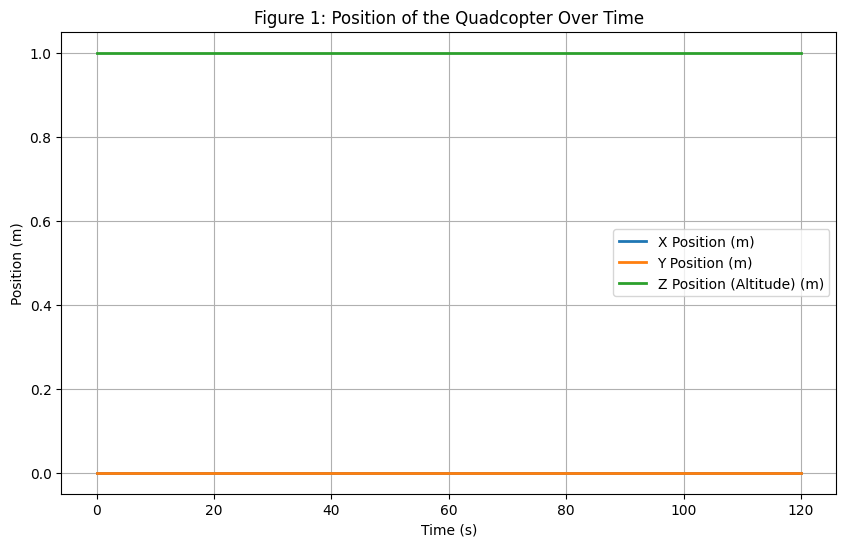

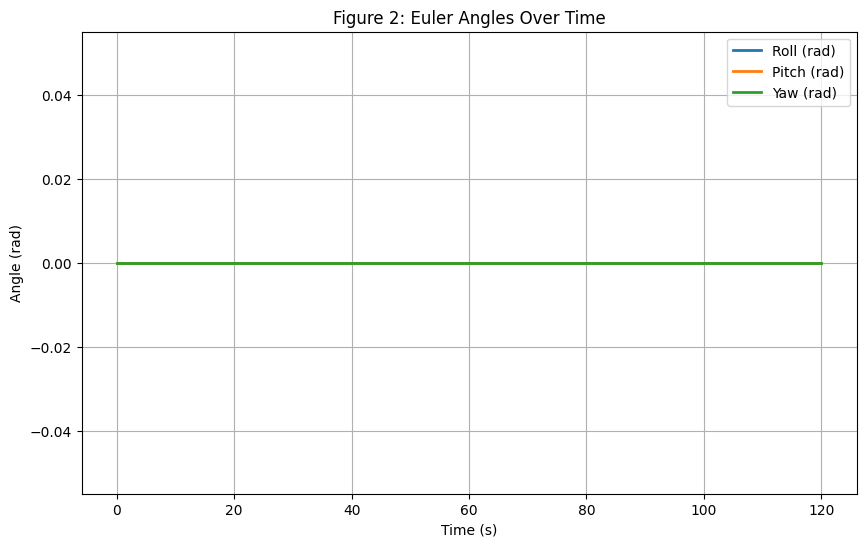

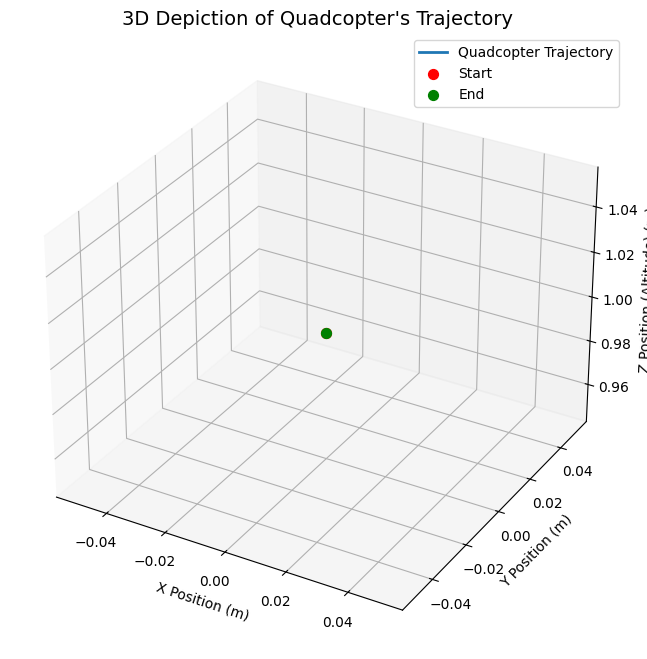

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Updated Constants based on your quadcopter's dimensions and masses
Mtotal = 0.7749
Marm = 0.03
Larm = 0.1437
Warm = 0.1016
Harm = 0.0105

Mbody = 0.165
Lbody = 0.127
Wbody = 0.0254
Hbody = 0.0268


# Calculate Moments of Inertia
ixx = (1/12) * Mbody * (Wbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Harm**2 + Warm**2) + Marm * Larm**2)

iyy = (1/12) * Mbody * (Lbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Warm**2) + Marm * Larm**2)

izz = (1/12) * Mbody * (Lbody**2 + Wbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Harm**2))

# Constants for quadcopter simulation
u = {
    "mass": Mtotal,  # Total mass of the quadcopter (kg)
    "g": 9.81,       # Gravitational acceleration (m/s^2)
    "k_t": 3.68e-6,  # Thrust coefficient (N·s^2/rad^2)
    "l": Larm,       # Rotor arm length (m)
    "I_xx": ixx,     # Moment of inertia about x-axis (kg·m^2)
    "I_yy": iyy,     # Moment of inertia about y-axis (kg·m^2)
    "I_zz": izz,     # Moment of inertia about z-axis (kg·m^2)
}

# Adjust hover thrust for precise balance
w_hover = np.sqrt((u["mass"] * u["g"]) / (4 * u["k_t"]))

# Rotation matrix for hover (orientation is fixed)
def rotation_matrix(roll, pitch, yaw):
    R = np.array([
        [
            np.cos(yaw) * np.cos(pitch),
            np.sin(roll) * np.sin(pitch) * np.cos(yaw) - np.sin(yaw) * np.cos(roll),
            np.cos(roll) * np.sin(pitch) * np.cos(yaw) + np.sin(yaw) * np.sin(roll),
        ],
        [
            np.sin(yaw) * np.cos(pitch),
            np.sin(roll) * np.sin(pitch) * np.sin(yaw) + np.cos(yaw) * np.cos(roll),
            np.cos(roll) * np.sin(pitch) * np.sin(yaw) - np.sin(roll) * np.cos(yaw),
        ],
        [
            -np.sin(pitch),
            np.cos(pitch) * np.sin(roll),
            np.cos(roll) * np.cos(pitch),
        ],
    ])
    return R

# Equations of motion for hover
def quadcopter_hover_eom(t, state):
    x, y, z, dx, dy, dz, roll, pitch, yaw, droll, dpitch, dyaw = state

    # Hover thrust balanced with gravity
    T = u["mass"] * u["g"]
    F_g = np.array([0, 0, -u["mass"] * u["g"]])  # Gravitational force
    F_T = np.dot(rotation_matrix(0, 0, 0), np.array([0, 0, T]))  # Thrust force in inertial frame
    F_total = F_g + F_T  # Total force

    # Linear accelerations
    ddx = F_total[0] / u["mass"]
    ddy = F_total[1] / u["mass"]
    ddz = F_total[2] / u["mass"]

    # Rotational accelerations (fixed orientation)
    d2roll = 0
    d2pitch = 0
    d2yaw = 0

    return [dx, dy, dz, ddx, ddy, ddz, droll, dpitch, dyaw, d2roll, d2pitch, d2yaw]

# Initial conditions (hover)
initial_state_hover = [0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Simulation time
t_span = (0, 120)  # 2 minutes
t_eval = np.linspace(0, 120, 1000)

# Solve the equations of motion
solution = solve_ivp(
    quadcopter_hover_eom,
    t_span,
    initial_state_hover,
    t_eval=t_eval,
    method="RK45"
)

# Extract results
x, y, z = solution.y[0], solution.y[1], solution.y[2]
roll, pitch, yaw = solution.y[6], solution.y[7], solution.y[8]

# Plot Position of the quadcopter over time
plt.figure(figsize=(10, 6))
plt.plot(solution.t, x, label="X Position (m)", linewidth=2)
plt.plot(solution.t, y, label="Y Position (m)", linewidth=2)
plt.plot(solution.t, z, label="Z Position (Altitude) (m)", linewidth=2)
plt.title("Figure 1: Position of the Quadcopter Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()
plt.show()

# Plot Euler angles (Roll, Pitch, Yaw) over time
plt.figure(figsize=(10, 6))
plt.plot(solution.t, roll, label="Roll (rad)", linewidth=2)
plt.plot(solution.t, pitch, label="Pitch (rad)", linewidth=2)
plt.plot(solution.t, yaw, label="Yaw (rad)", linewidth=2)
plt.title("Figure 2: Euler Angles Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, label="Quadcopter Trajectory", linewidth=2)

# Mark the initial and final points
ax.scatter(x[0], y[0], z[0], color="red", label="Start", s=50)
ax.scatter(x[-1], y[-1], z[-1], color="green", label="End", s=50)

# Labels and title
ax.set_title("3D Depiction of Quadcopter's Trajectory", fontsize=14)
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (Altitude) (m)")

# Grid and legend
ax.grid(True)
ax.legend()

# Display the 3D plot
plt.show()

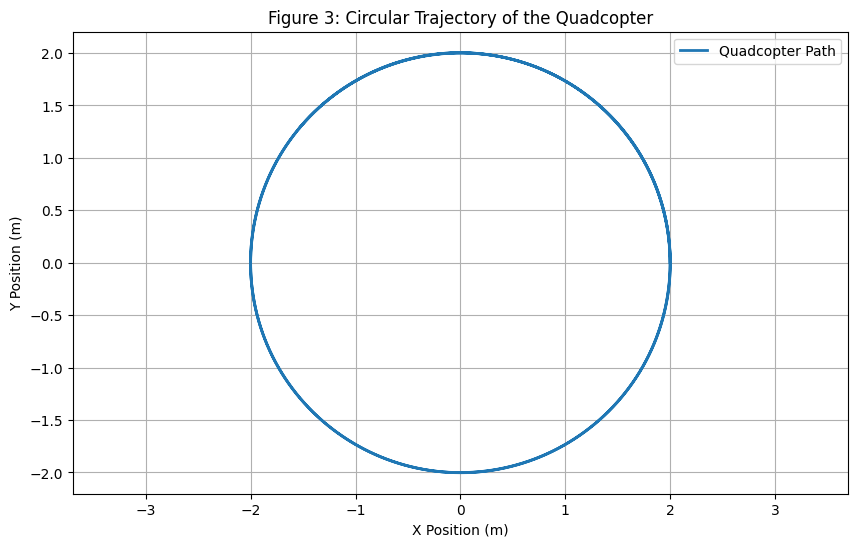

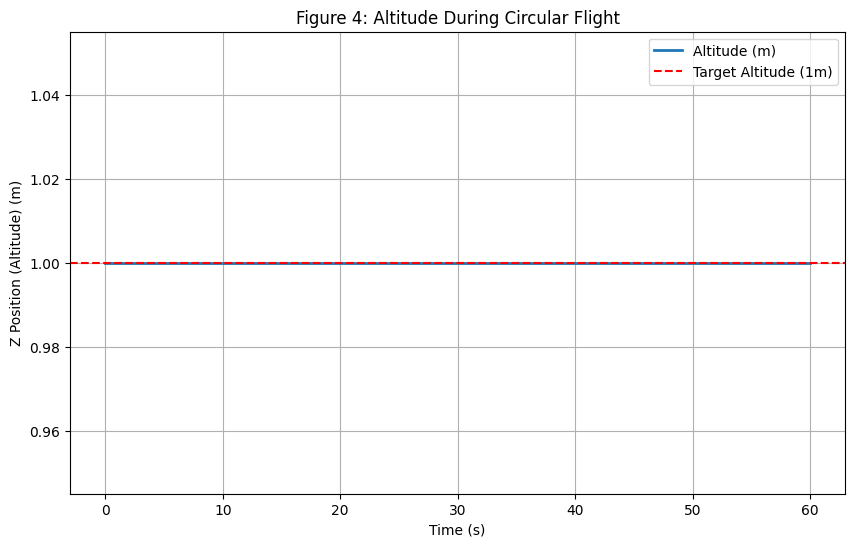

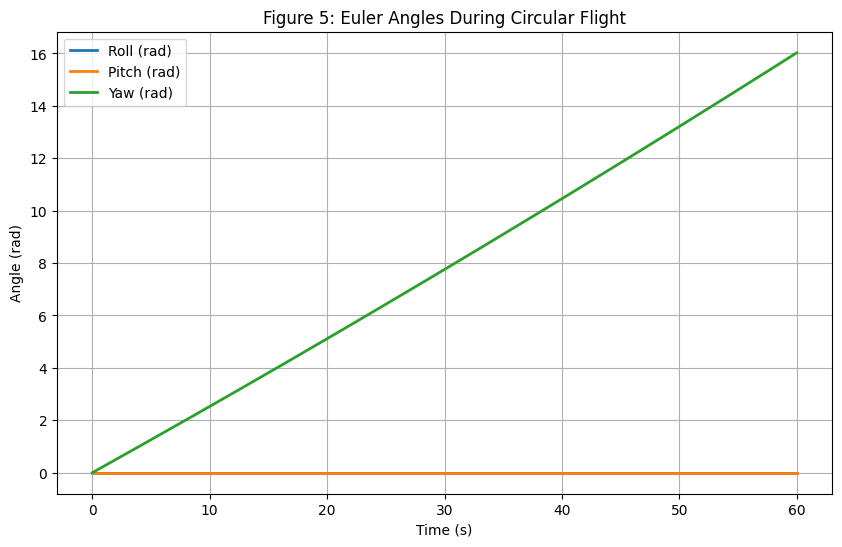

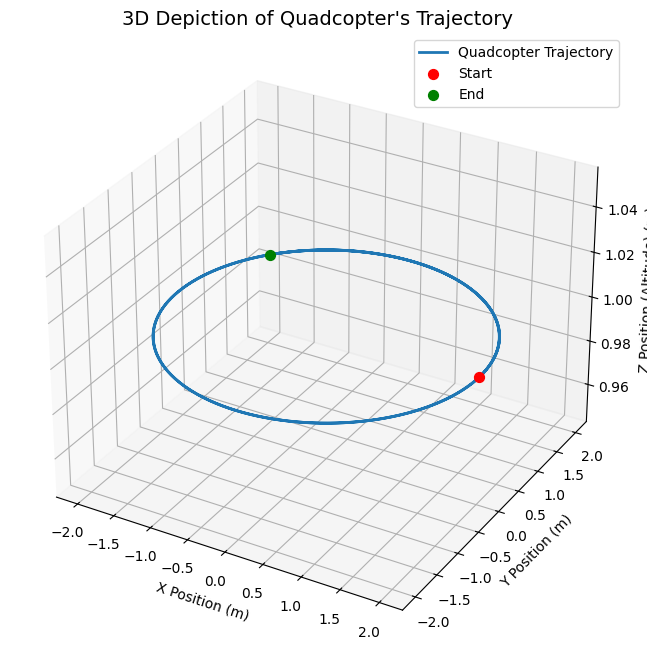

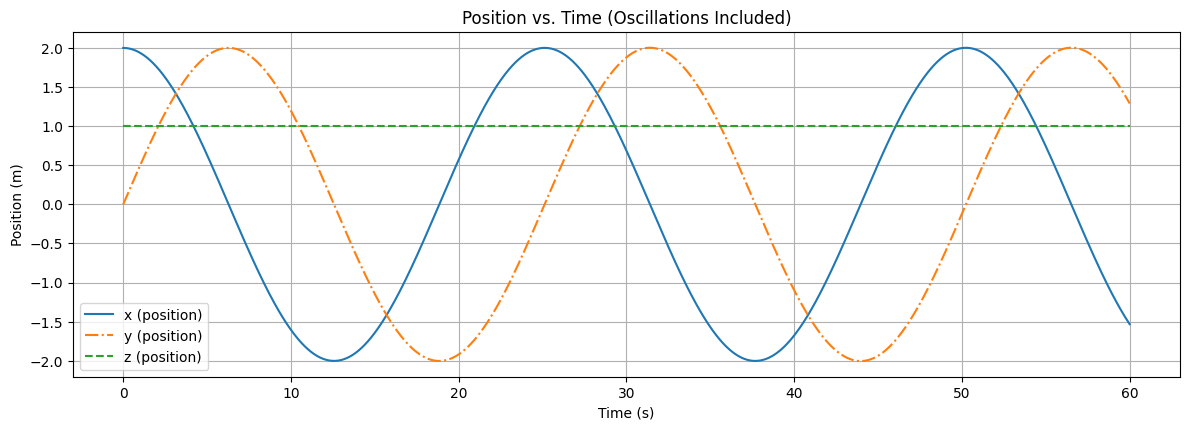

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

Mtotal = 0.7749
Marm = 0.03
Larm = 0.1437
Warm = 0.1016
Harm = 0.0105

Mbody = 0.165
Lbody = 0.127
Wbody = 0.0254
Hbody = 0.0268


# Calculate Moments of Inertia
ixx = (1/12) * Mbody * (Wbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Harm**2 + Warm**2) + Marm * Larm**2)

iyy = (1/12) * Mbody * (Lbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Warm**2) + Marm * Larm**2)

izz = (1/12) * Mbody * (Lbody**2 + Wbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Harm**2))

# Constants
u = {
    "mass": Mtotal,       # Total mass of the quadcopter (kg)
    "g": 9.81,            # Gravitational acceleration (m/s^2)
    "k_t": 3.68e-6,       # Thrust coefficient (N·s^2/rad^2)
    "k_d": 1e-6,          # Drag coefficient
    "l": Larm,            # Rotor arm length (m)
    "I_xx": ixx,          # Moment of inertia about x-axis (kg·m^2)
    "I_yy": iyy,          # Moment of inertia about y-axis (kg·m^2)
    "I_zz": izz,          # Moment of inertia about z-axis (kg·m^2)
}

# Desired flight parameters
radius = 2  # Circle radius (m)
altitude = 1  # Altitude (m)
speed = 0.5  # Speed along the circle (m/s)
omega = speed / radius  # Angular velocity for circular motion (rad/s)

# Initial conditions
x0, y0, z0 = radius, 0, altitude  # Start at (radius, 0, altitude)
dx0, dy0, dz0 = 0, speed, 0  # Initial velocity
roll0, pitch0, yaw0 = 0, 0, 0  # Initial orientation
droll0, dpitch0, dyaw0 = 0, 0, omega  # Initial angular velocity

initial_state = [x0, y0, z0, dx0, dy0, dz0, roll0, pitch0, yaw0, droll0, dpitch0, dyaw0]

# Rotation matrix
def rotation_matrix(roll, pitch, yaw):
    R = np.array([
        [
            np.cos(yaw) * np.cos(pitch),
            np.sin(roll) * np.sin(pitch) * np.cos(yaw) - np.sin(yaw) * np.cos(roll),
            np.cos(roll) * np.sin(pitch) * np.cos(yaw) + np.sin(yaw) * np.sin(roll),
        ],
        [
            np.sin(yaw) * np.cos(pitch),
            np.sin(roll) * np.sin(pitch) * np.sin(yaw) + np.cos(yaw) * np.cos(roll),
            np.cos(roll) * np.sin(pitch) * np.sin(yaw) - np.sin(roll) * np.cos(yaw),
        ],
        [
            -np.sin(pitch),
            np.cos(pitch) * np.sin(roll),
            np.cos(roll) * np.cos(pitch),
        ],
    ])
    return R

# Equations of motion
def quadcopter_eom(t, state):
    x, y, z, dx, dy, dz, roll, pitch, yaw, droll, dpitch, dyaw = state

    # Gravitational force
    F_g = np.array([0, 0, -u["mass"] * u["g"]])  # Gravity vector

    # Thrust to maintain altitude and circular motion
    T = u["mass"] * u["g"]  # Maintain altitude
    F_T_body = np.array([0, 0, T])  # Thrust in body frame
    F_T_inertial = np.dot(rotation_matrix(roll, pitch, yaw), F_T_body)  # Transform to inertial frame

    # Adjust thrust for circular motion
    F_circular = np.array([-u["mass"] * omega**2 * x, -u["mass"] * omega**2 * y, 0])  # Centripetal force
    F_total = F_g + F_T_inertial + F_circular
    ddx, ddy, ddz = F_total / u["mass"]

    # Torques
    tau_roll = 0
    tau_pitch = 0
    tau_yaw = u["k_d"] * omega

    # Rotational dynamics
    d2roll = (tau_roll - (u["I_yy"] - u["I_zz"]) * dpitch * dyaw) / u["I_xx"]
    d2pitch = (tau_pitch - (u["I_zz"] - u["I_xx"]) * droll * dyaw) / u["I_yy"]
    d2yaw = (tau_yaw - (u["I_xx"] - u["I_yy"]) * droll * dpitch) / u["I_zz"]

    return [dx, dy, dz, ddx, ddy, ddz, droll, dpitch, dyaw, d2roll, d2pitch, d2yaw]

# Simulation time
t_span = (0, 60)  # 1 minute
t_eval = np.linspace(0, 60, 1000)

# Solve the equations of motion
solution = solve_ivp(
    quadcopter_eom,
    t_span,
    initial_state,
    t_eval=t_eval,
    method="RK45"
)


# Extract results
x, y, z = solution.y[0], solution.y[1], solution.y[2]
roll, pitch, yaw = solution.y[6], solution.y[7], solution.y[8]

# Figure 3: Circular trajectory in the x-y plane
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Quadcopter Path", linewidth=2)
plt.title("Figure 3: Circular Trajectory of the Quadcopter")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.legend()
plt.grid()
plt.axis("equal")
plt.show()

# Figure 4: Altitude over time
plt.figure(figsize=(10, 6))
plt.plot(solution.t, z, label="Altitude (m)", linewidth=2)
plt.axhline(altitude, color="red", linestyle="--", label="Target Altitude (1m)")
plt.title("Figure 4: Altitude During Circular Flight")
plt.xlabel("Time (s)")
plt.ylabel("Z Position (Altitude) (m)")
plt.legend()
plt.grid()
plt.show()

# Figure 5: Euler angles over time
plt.figure(figsize=(10, 6))
plt.plot(solution.t, roll, label="Roll (rad)", linewidth=2)
plt.plot(solution.t, pitch, label="Pitch (rad)", linewidth=2)
plt.plot(solution.t, yaw, label="Yaw (rad)", linewidth=2)
plt.title("Figure 5: Euler Angles During Circular Flight")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid()
plt.show()


# 3D trajectory plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, label="Quadcopter Trajectory", linewidth=2)
ax.scatter(x[0], y[0], z[0], color="red", label="Start", s=50)
ax.scatter(x[-1], y[-1], z[-1], color="green", label="End", s=50)
ax.set_title("3D Depiction of Quadcopter's Trajectory", fontsize=14)
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (Altitude) (m)")
ax.legend()
plt.show()


# Position plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(solution.t, x, label='x (position)', linestyle='-')
plt.plot(solution.t, y, label='y (position)', linestyle='-.')
plt.plot(solution.t, z, label='z (position)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time (Oscillations Included)')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()


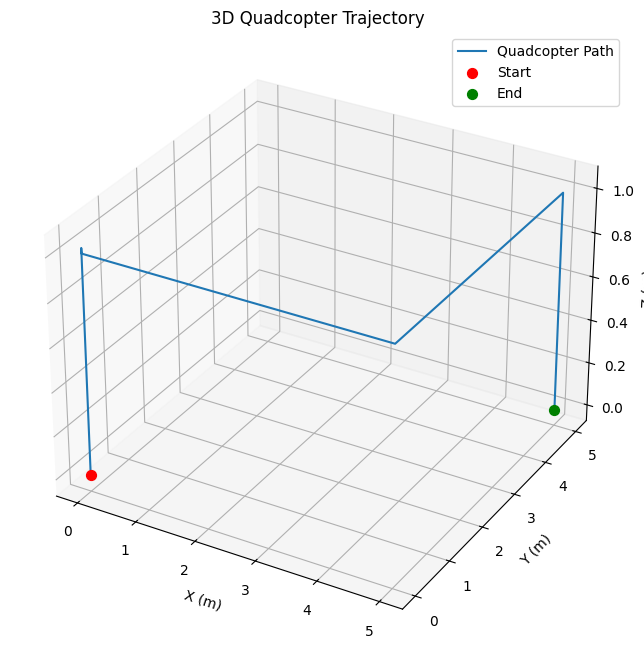

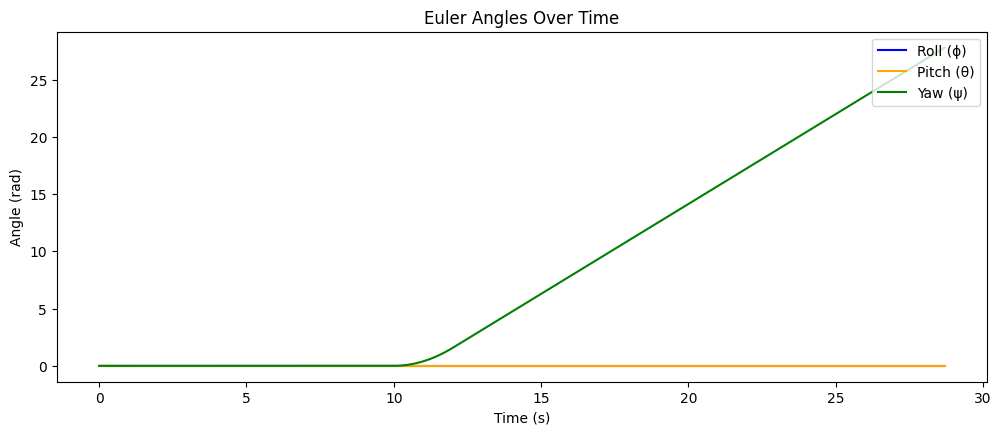

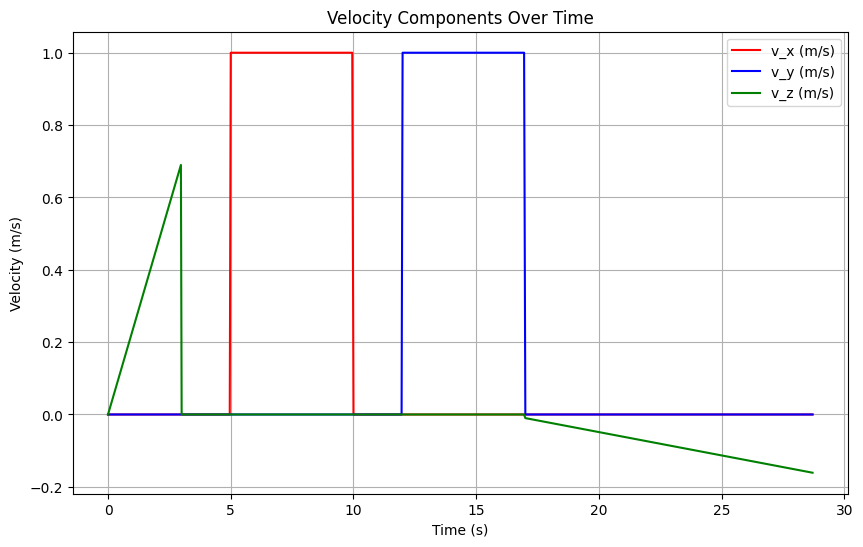

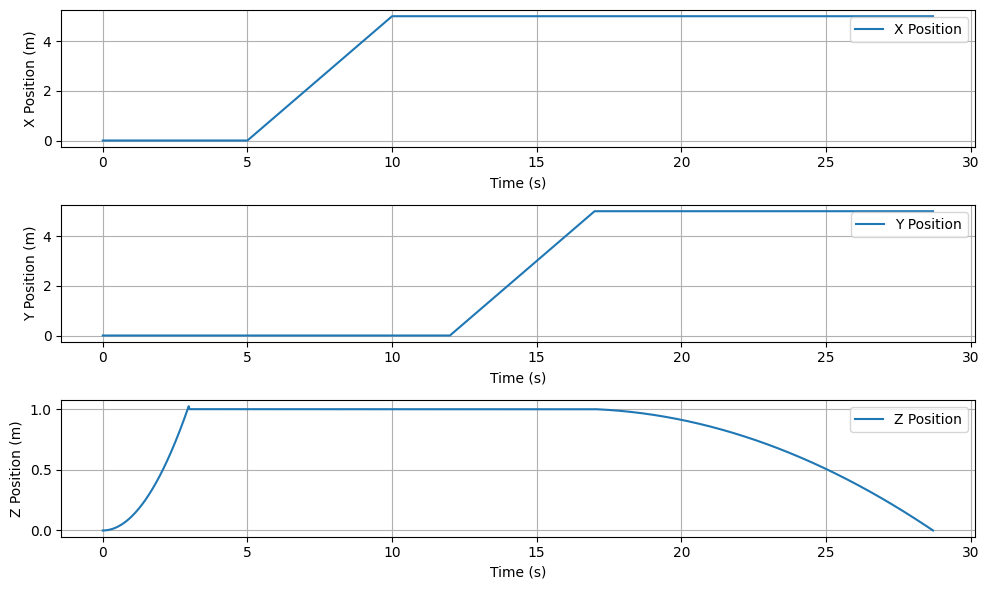

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
Mtotal = 0.7749
Marm = 0.03
Larm = 0.1437
Warm = 0.1016
Harm = 0.0105

Mbody = 0.165
Lbody = 0.127
Wbody = 0.0254
Hbody = 0.0268


# Calculate Moments of Inertia
ixx = (1/12) * Mbody * (Wbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Harm**2 + Warm**2) + Marm * Larm**2)

iyy = (1/12) * Mbody * (Lbody**2 + Hbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Warm**2) + Marm * Larm**2)

izz = (1/12) * Mbody * (Lbody**2 + Wbody**2) \
   + 4 * ((1/12) * Marm * (Larm**2 + Harm**2))

u = {
    "mass": Mtotal,
    "g": 9.81,
    "k_t": 3.68e-6,
    "k_d": 1e-6,
    "l": Larm,
    "I_xx": ixx,
    "I_yy": iyy,
    "I_zz": izz,
}

# 3D Rotation matrix
def rotation_matrix(roll, pitch, yaw):
    R = np.array([
        [
            np.cos(yaw) * np.cos(pitch),
            np.cos(yaw) * np.sin(pitch) * np.sin(roll) - np.sin(yaw) * np.cos(roll),
            np.cos(yaw) * np.sin(pitch) * np.cos(roll) + np.sin(yaw) * np.sin(roll),
        ],
        [
            np.sin(yaw) * np.cos(pitch),
            np.sin(yaw) * np.sin(pitch) * np.sin(roll) + np.cos(yaw) * np.cos(roll),
            np.sin(yaw) * np.sin(pitch) * np.cos(roll) - np.cos(yaw) * np.sin(roll),
        ],
        [
            -np.sin(pitch),
            np.cos(pitch) * np.sin(roll),
            np.cos(pitch) * np.cos(roll),
        ],
    ])
    return R

# Equations of motion
def quadcopter_eom(t, state, thrust, yaw_rate):
    x, y, z, dx, dy, dz, roll, pitch, yaw, droll, dpitch, dyaw = state

    # Forces
    F_g = np.array([0, 0, -u["mass"] * u["g"]])  # Gravity
    F_T_body = np.array([0, 0, thrust])  # Thrust in body frame
    F_T_inertial = np.dot(rotation_matrix(roll, pitch, yaw), F_T_body)  # Transform thrust to world frame
    F_total = F_g + F_T_inertial  # Total force in world frame
    ddx, ddy, ddz = F_total / u["mass"]  # Accelerations

    # Torques
    d2roll = 0
    d2pitch =
    d2yaw = yaw_rate  # Yaw dynamics

    return [dx, dy, dz, ddx, ddy, ddz, droll, dpitch, dyaw, d2roll, d2pitch, d2yaw]

# Phases of motion
phases = []

# Phase 1: Vertical ascent to 1m
thrust = u["mass"] * u["g"] + 0.18  # Slightly more than hover thrust for controlled ascent
yaw_rate = 0
initial_state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Initial state at ground level
t_span = (0, 3)  # Simulate for 3 seconds to reach 1m

# Solve the ascent phase
solution = solve_ivp(
    quadcopter_eom,
    t_span,
    initial_state,
    args=(thrust, yaw_rate),
    t_eval=np.linspace(0, 3, 100)
)


hover_thrust = u["mass"] * u["g"]  # Hover thrust
stable_initial_state = solution.y[:, -1]
if stable_initial_state[2] > 1:
    stable_initial_state[2] = 1
stable_initial_state[3:6] = [0, 0, 0]  # Zero velocities
t_stable = (3, 5)
solution_stable = solve_ivp(
    quadcopter_eom,
    t_stable,
    stable_initial_state,
    args=(hover_thrust, yaw_rate),
    t_eval=np.linspace(3, 5, 50)
)

    # Combine the solutions
solution.t = np.concatenate((solution.t, solution_stable.t))
solution.y = np.concatenate((solution.y, solution_stable.y), axis=1)

# Save Phase 1
phases.append(solution)



# Phase 2: Horizontal motion at 1m altitude
thrust = u["mass"] * u["g"]  # Hover thrust to maintain 1m altitude
yaw_rate = 0
initial_state = solution.y[:, -1]
initial_state[3] = 1  # Set x velocity for horizontal motion
initial_state[5] = 0  # Zero vertical velocity to maintain constant height
initial_state[2] = 1  # Ensure z position starts at 1m
t_span = (5, 10)
solution = solve_ivp(quadcopter_eom, t_span, initial_state, args=(thrust, yaw_rate), t_eval=np.linspace(5, 10, 100))
phases.append(solution)

# Phase 3: Hover and yaw 90° to the left at 1m altitude
thrust = u["mass"] * u["g"]  # Maintain altitude during yaw
yaw_rate = np.pi / 2 / 2  # 90-degree yaw over 2 seconds
initial_state = solution.y[:, -1]
initial_state[3:6] = [0, 0, 0]  # Stop all linear motion
initial_state[2] = 1  # Ensure z position remains at 1m
t_span = (10, 12)
solution = solve_ivp(quadcopter_eom, t_span, initial_state, args=(thrust, yaw_rate), t_eval=np.linspace(10, 12, 50))
phases.append(solution)

# Phase 4: Horizontal motion in new direction at 1m altitude
thrust = u["mass"] * u["g"]  # Hover thrust to maintain 1m altitude
yaw_rate = 0
initial_state = solution.y[:, -1]
yaw = initial_state[8]  # Extract yaw angle
R_yaw = np.array([
    [np.cos(yaw), -np.sin(yaw)],
    [np.sin(yaw),  np.cos(yaw)],
])
initial_state[3:5] = np.dot(R_yaw, [1, 0])  # Update velocity for the new direction
initial_state[5] = 0  # Zero vertical velocity to maintain constant height
initial_state[2] = 1  # Ensure z position remains at 1m
t_span = (12, 17)
solution = solve_ivp(quadcopter_eom, t_span, initial_state, args=(thrust, yaw_rate), t_eval=np.linspace(12, 17, 100))
phases.append(solution)

# Phase 5: Vertical descent to ground
thrust = u["mass"] * u["g"] - 0.01  # Reduced thrust for controlled descent
yaw_rate = 0
initial_state = solution.y[:, -1]
initial_state[3:6] = [0, 0, -0.01]  # Slow vertical descent velocity
t_span = (17, 28.7)  # Sufficient duration to ensure quadcopter reaches ground
solution = solve_ivp(quadcopter_eom, t_span, initial_state, args=(thrust, yaw_rate), t_eval=np.linspace(17, 28.7, 150))
phases.append(solution)


# Combine results
x, y, z = [], [], []
for phase in phases:
    x.extend(phase.y[0])
    y.extend(phase.y[1])
    z.extend(phase.y[2])

# 3D Trajectory Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, label="Quadcopter Path")
ax.scatter(x[0], y[0], z[0], color="red", label="Start", s=50)
ax.scatter(x[-1], y[-1], z[-1], color="green", label="End", s=50)
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
ax.set_title("3D Quadcopter Trajectory")
ax.legend()
plt.show()

fig = plt.figure(figsize=(12, 10))


# Euler Angles Over Time
time = []
roll = []
pitch = []
yaw = []

for phase in phases:
    time.extend(phase.t)
    roll.extend(phase.y[6])  # Roll
    pitch.extend(phase.y[7])  # Pitch
    yaw.extend(phase.y[8])  # Yaw

# Create subplots for Euler angles
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(time, roll, label="Roll (ϕ)", color="blue")
ax2.plot(time, pitch, label="Pitch (θ)", color="orange")
ax2.plot(time, yaw, label="Yaw (ψ)", color="green")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Angle (rad)")
ax2.set_title("Euler Angles Over Time")
ax2.legend(loc="upper right")

plt.show()

# Velocity Components Over Time
velocity_x = []
velocity_y = []
velocity_z = []
time = []

for phase in phases:
    velocity_x.extend(phase.y[3])  # Velocity in x
    velocity_y.extend(phase.y[4])  # Velocity in y
    velocity_z.extend(phase.y[5])  # Velocity in z
    time.extend(phase.t)  # Time for each phase

# Plot the velocities
plt.figure(figsize=(10, 6))
plt.plot(time, velocity_x, label="v_x (m/s)", color="red")
plt.plot(time, velocity_y, label="v_y (m/s)", color="blue")
plt.plot(time, velocity_z, label="v_z (m/s)", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Components Over Time")
plt.legend(loc="upper right")
plt.grid()
plt.show()

# Plot x, y, z positions against time
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time, x, label="X Position")
plt.xlabel('Time (s)')
plt.ylabel('X Position (m)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, y, label="Y Position")
plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, z, label="Z Position")
plt.xlabel('Time (s)')
plt.ylabel('Z Position (m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
